In [1]:
import os
import shutil


gray_sky_path = '/Users/frodo/Desktop/ssim/gray_sky/'
all_imgs_path = '/Users/frodo/Desktop/timestamp-selected-sunset_resize/'
gray_imgs = set()
all_imgs = set()
for element in os.listdir(gray_sky_path):
    gray_imgs.add(element)
for element in os.listdir(all_imgs_path):
    all_imgs.add(element)
sunset_imgs = all_imgs.difference(gray_imgs)
sunset_path = '/Users/frodo/Desktop/ssim/sunsets/'
for img in sunset_imgs:
    if img.endswith('jpg'):
        shutil.copy(all_imgs_path+img, sunset_path)

In [52]:
from scipy.ndimage import gaussian_filter
from skimage.util.dtype import dtype_range
from skimage.measure import compare_ssim
from glob import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt


def ssim_components(X,Y,data_range=None): 
    if data_range is None:
        if X.dtype != Y.dtype:
            warn("Inputs have mismatched dtype.  Setting data_range based on "
                 "X.dtype.")
        dmin, dmax = dtype_range[X.dtype.type]
        data_range = dmax - dmin
        
    K1 = 0.01
    K2 = 0.03
    R = data_range
    c1 = (K1 * R) ** 2
    c2 = (K2 * R) ** 2
    c3 = c2 / 2.
    filter_args = {'sigma': 1.5}
    # compute (weighted) means
    ux = gaussian_filter(X, **filter_args)
    uy = gaussian_filter(Y, **filter_args)

    # compute (weighted) variances and covariances
    uxx = gaussian_filter(X * X, **filter_args)
    uyy = gaussian_filter(Y * Y, **filter_args)
    uxy = gaussian_filter(X * Y, **filter_args)
    vx = (uxx - ux * ux)
    vy = (uyy - uy * uy)
    vxy = (uxy - ux * uy)

    l = (2 * ux * uy + c1) / (ux ** 2 + uy ** 2 + c1)
    c = (2 * vxy + c2) / (vx ** 2 + vy ** 2 + c2)
    s = (vxy + c3) / (vx * vy + c3)
    
    luminance = np.mean(l,axis=(0,1,2))
    contrast = np.mean(c,axis=(0,1,2))
    structure = np.mean(s,axis=(0,1,2))
    
    return luminance, contrast, structure

# 1529292900_0_2018-06-18-04-35-00
mean_image_path = '/Users/frodo/Desktop/timestamp-selected-sunset_resize/1529292900_0_2018-06-18-04-35-00.jpg'
mean_image = cv2.imread(mean_image_path)
ssim_gray = []
ssim_sunset= []
luminance_gray = []
luminance_sunset= []
contrast_gray = []
contrast_sunset= []
structure_gray = []
structure_sunset= []
path = '/Users/frodo/Desktop/ssim/'
for directory in glob(path+'*'):
    for img in os.listdir(directory):
        image_path = os.path.join(directory,img)
        image = cv2.imread(image_path)
        ssim = compare_ssim(mean_image, image, multichannel=True, \
                            gaussian_weights=True, sigma=1.5,\
                            use_sample_covariance=False)
        l, c, s = ssim_components(mean_image, image)
        label = directory.split('/')[-1]
        if label == 'gray_sky':
            ssim_gray.append(ssim)
            luminance_gray.append(l)
            contrast_gray.append(c)
            structure_gray.append(s)
        elif label == 'sunsets':
            ssim_sunset.append(ssim)
            luminance_sunset.append(l)
            contrast_sunset.append(c)
            structure_sunset.append(s)

Text(0,0.5,'Counts')

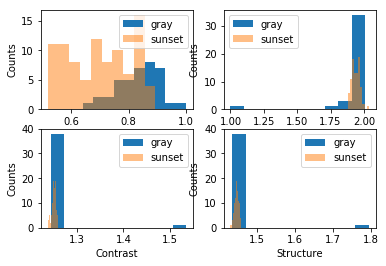

In [68]:
plt.subplot(221)
plt.hist(ssim_gray, label='gray')
plt.hist(ssim_sunset, label='sunset', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Structural Similarity Index')
plt.ylabel('Counts')


plt.subplot(222)
plt.hist(luminance_gray, label='gray')
plt.hist(luminance_sunset, label='sunset', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Luminance')
plt.ylabel('Counts')


plt.subplot(223)
plt.hist(contrast_gray, label='gray')
plt.hist(contrast_sunset, label='sunset', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Contrast')
plt.ylabel('Counts')


plt.subplot(224)
plt.hist(structure_gray, label='gray')
plt.hist(structure_sunset, label='sunset', alpha=0.5)
plt.legend(loc='best')
plt.xlabel('Structure')
plt.ylabel('Counts')